# Import Library

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load Dataset

In [20]:
application_train = pd.read_csv('dataset/application_train.csv')
application_test = pd.read_csv('dataset/application_test.csv')

bureau = pd.read_csv('dataset/bureau.csv')
bureau_balance = pd.read_csv('dataset/bureau_balance.csv')
credit_card_balance = pd.read_csv('dataset/credit_card_balance.csv')
installments_payments = pd.read_csv('dataset/installments_payments.csv')

prev_application = pd.read_csv('dataset/previous_application.csv')

sample_submission = pd.read_csv('dataset/sample_submission.csv')
POS_CASH_balance = pd.read_csv('dataset/POS_CASH_balance.csv')

# EDA

In [21]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [22]:
application_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [23]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [24]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [25]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [26]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [27]:
prev_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [28]:
POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


## Cek Data Duplikat

In [29]:
application_train.duplicated().sum()

0

In [30]:
application_train.duplicated().sum()

0

In [31]:
bureau_balance.duplicated().sum()

0

In [32]:
bureau.duplicated().sum()

0

In [33]:
credit_card_balance.duplicated().sum()

0

In [34]:
installments_payments.duplicated().sum()

0

In [35]:
prev_application.duplicated().sum()

0

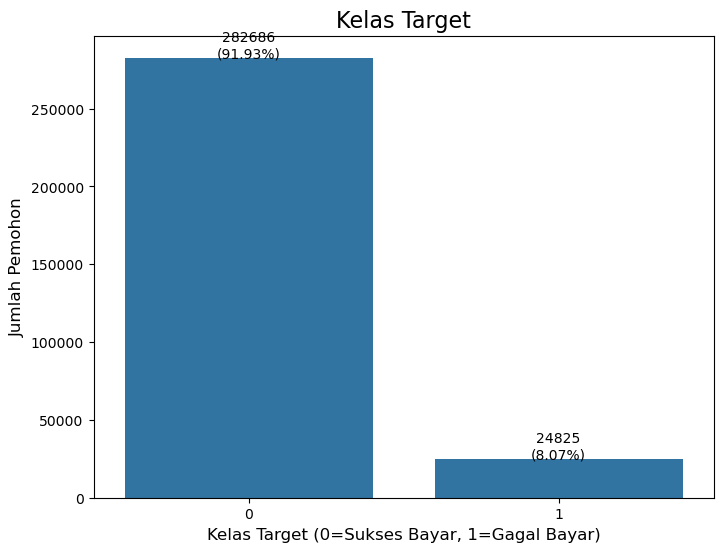

In [37]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='TARGET', data=application_train)

plt.title('Kelas Target', fontsize=16)
plt.xlabel('Kelas Target (0=Sukses Bayar, 1=Gagal Bayar)', fontsize=12)
plt.ylabel('Jumlah Pemohon', fontsize=12)

total = len(application_train)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{int(height)}\n({percentage})',
            ha="center", fontsize=10)

plt.show()

## Categorical Columns

In [47]:
categorical_column = application_train.select_dtypes(include=['object']).columns

## Numerical Columns

In [50]:
numerical_column = application_train.select_dtypes(['float64', 'int64']).columns.to_list()

In [44]:
application_train.drop(['SK_ID_CURR'], axis=1, inplace=True)

KeyError: "['SK_ID_CURR'] not found in axis"

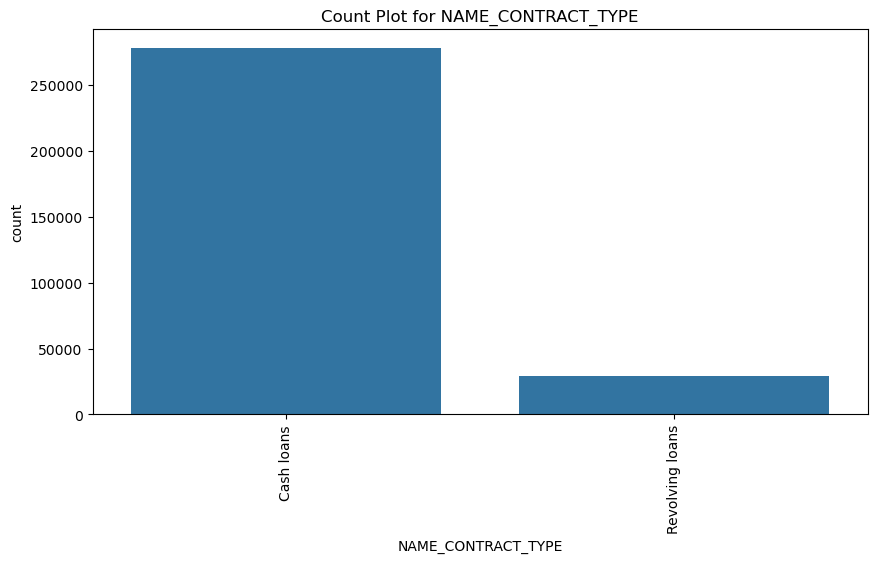

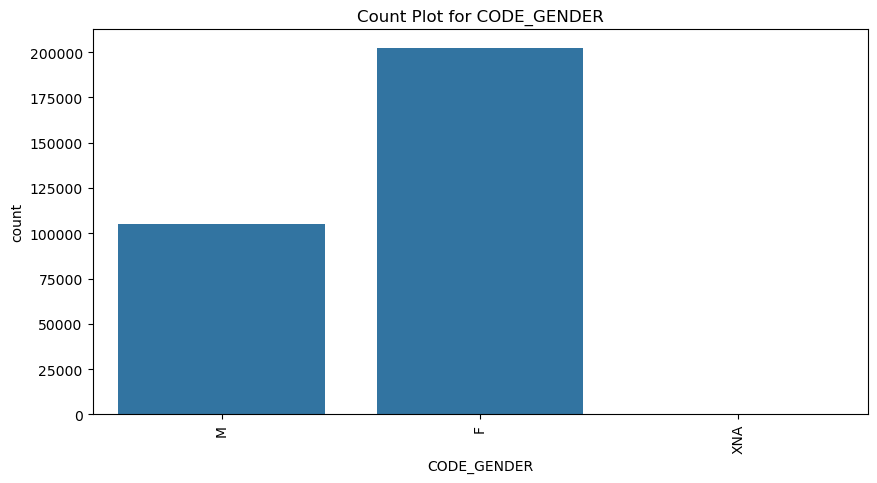

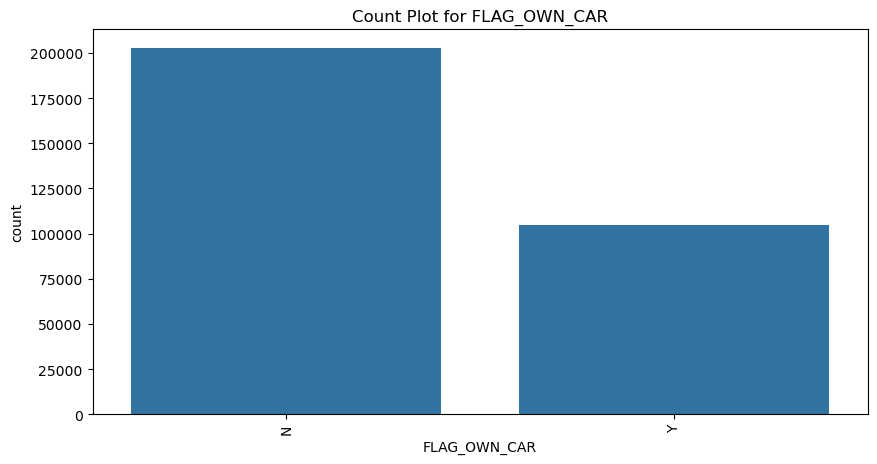

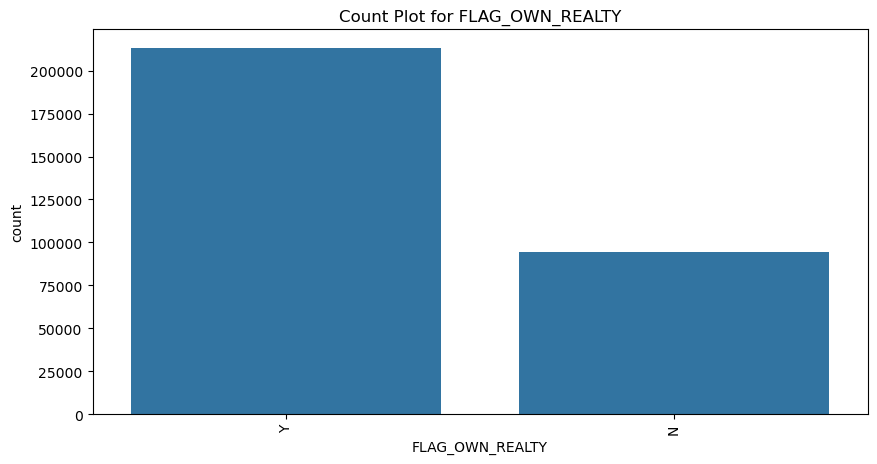

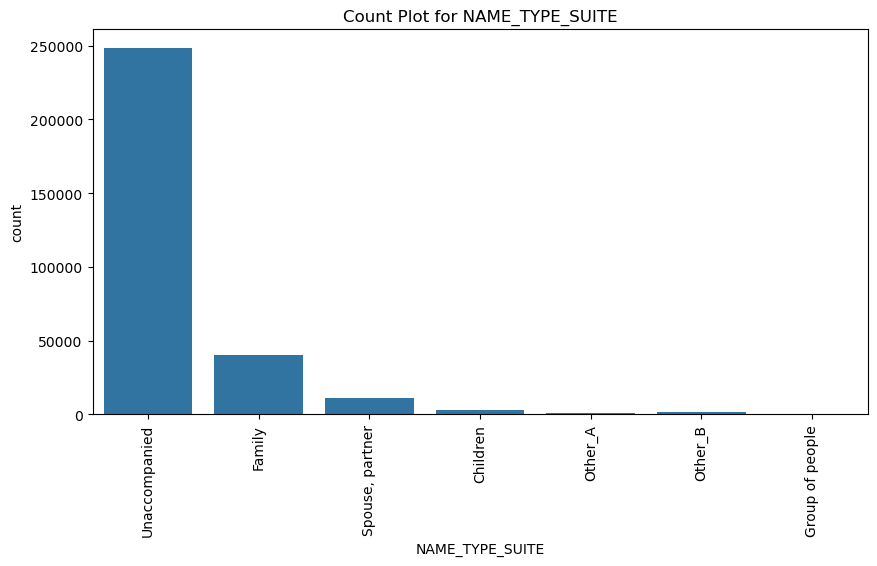

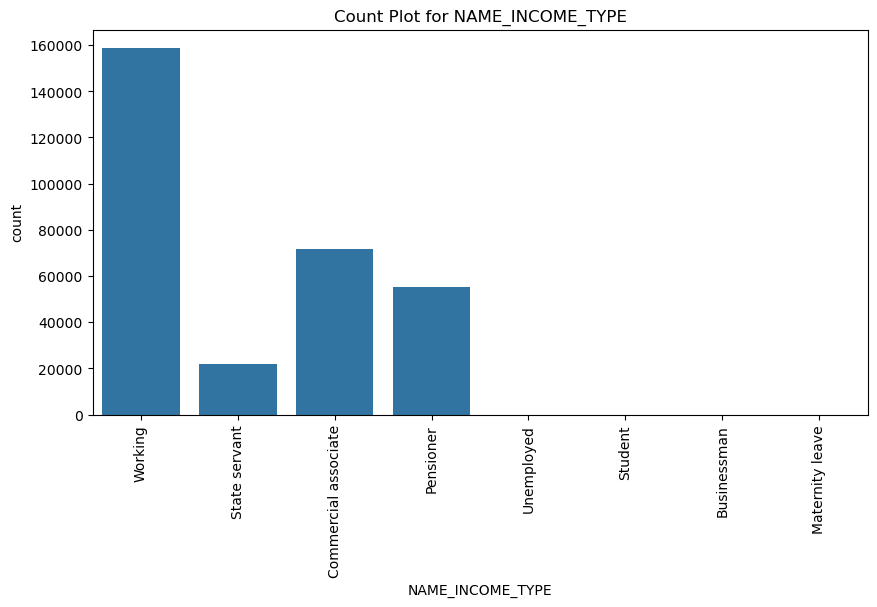

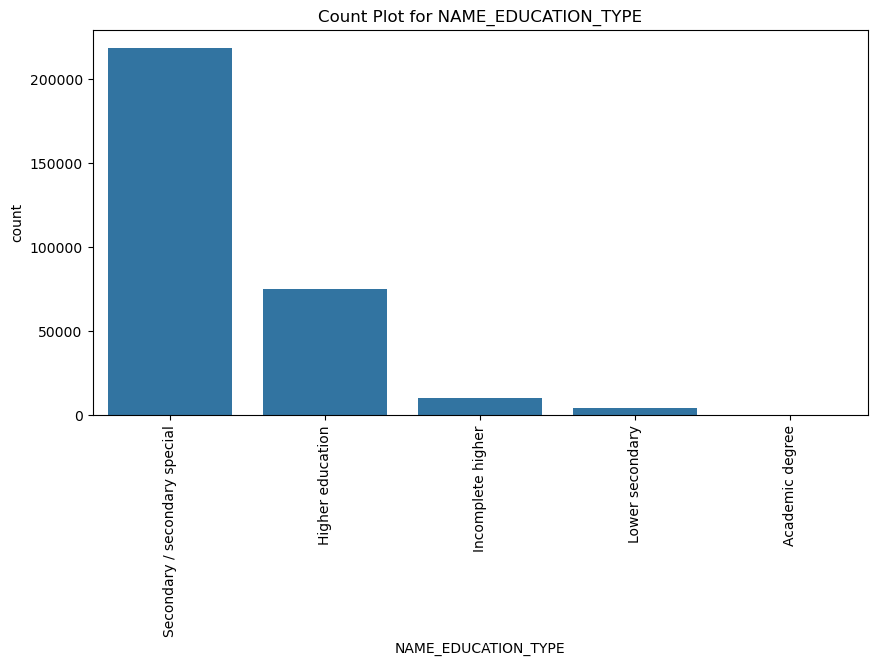

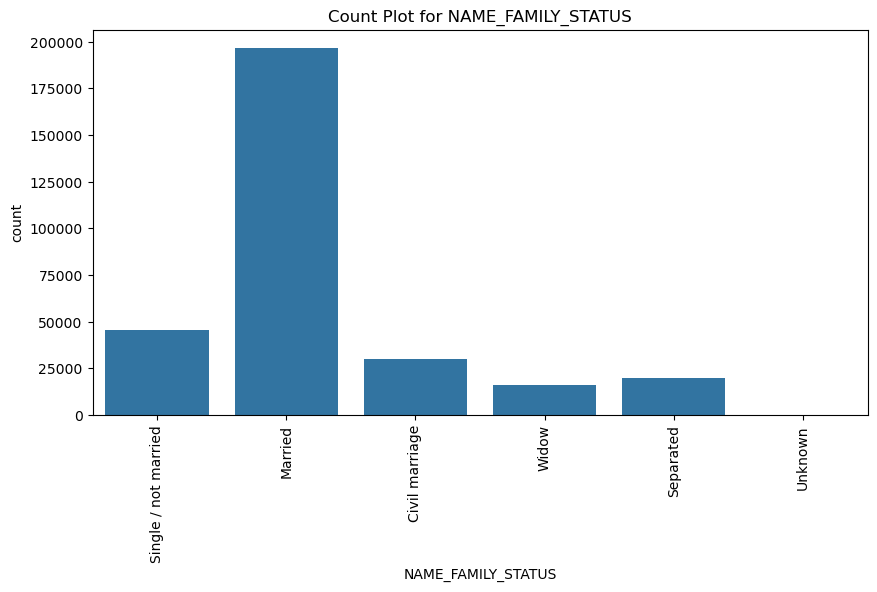

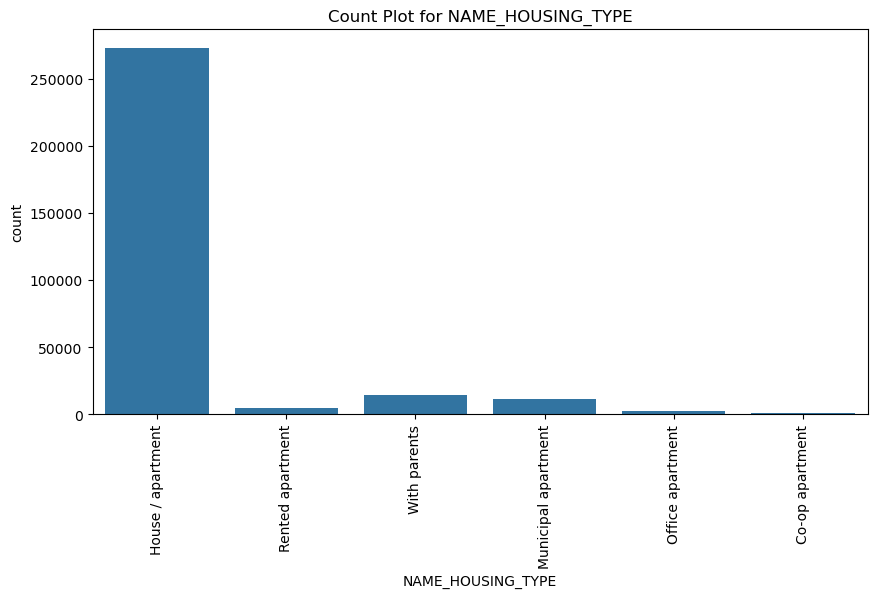

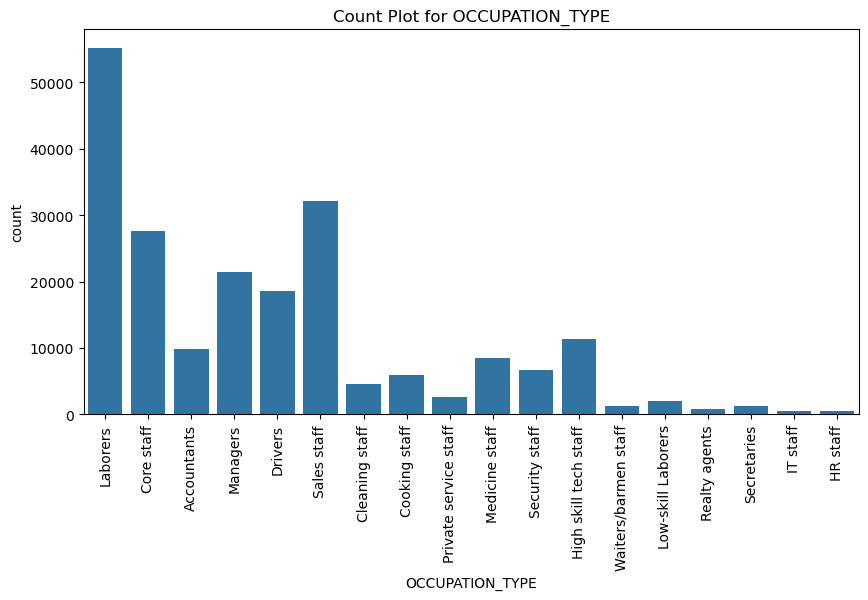

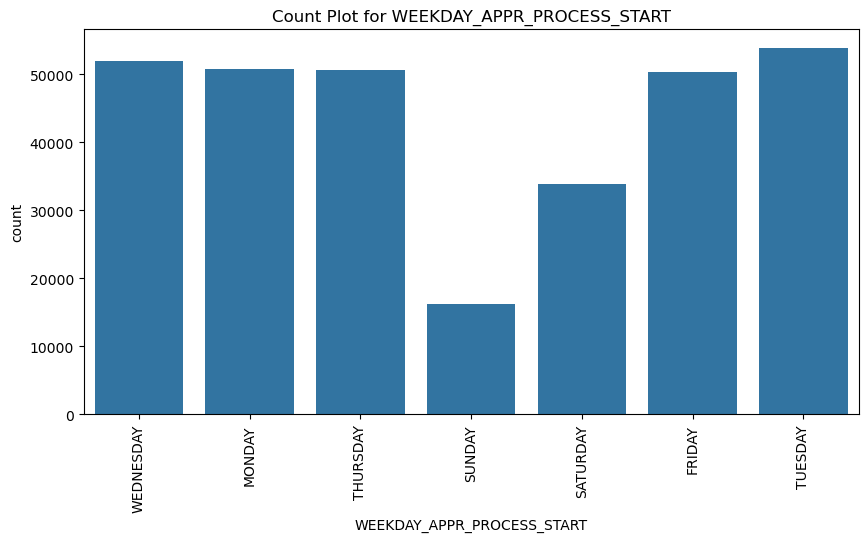

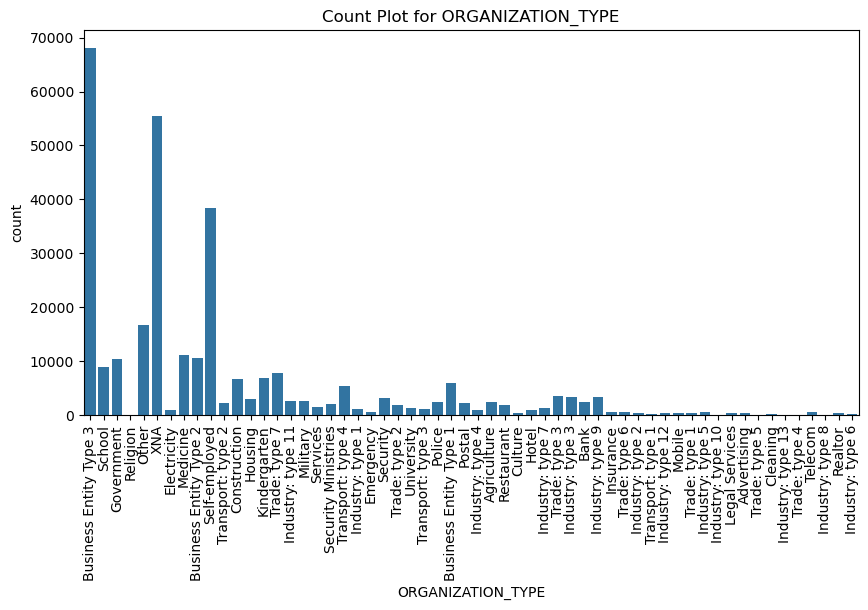

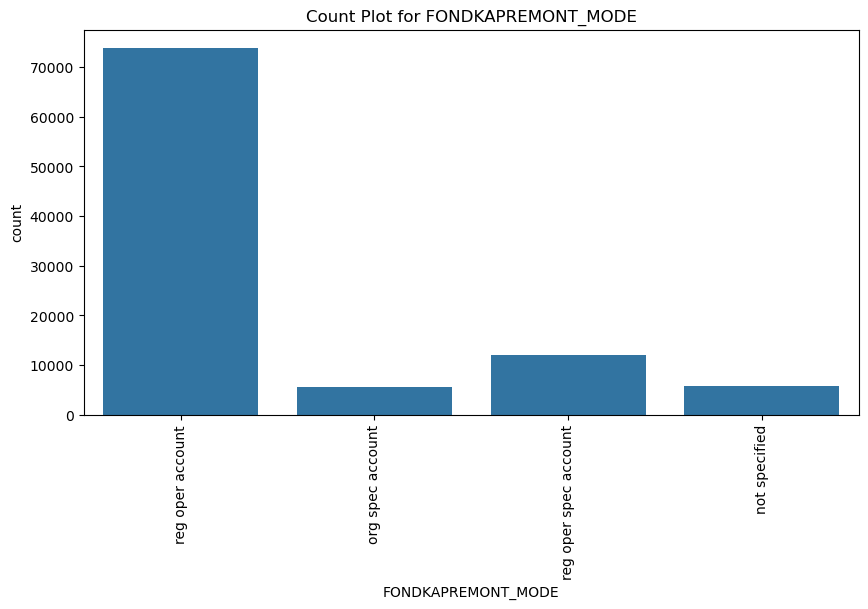

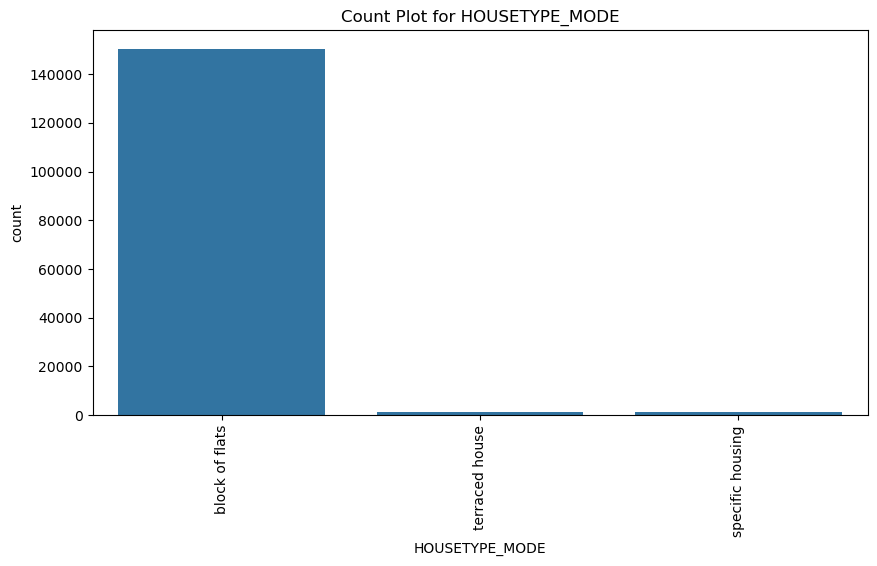

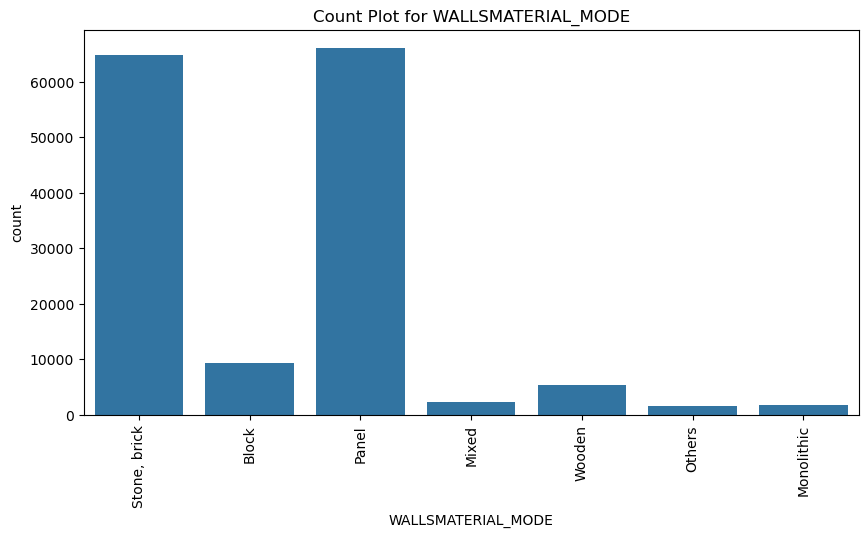

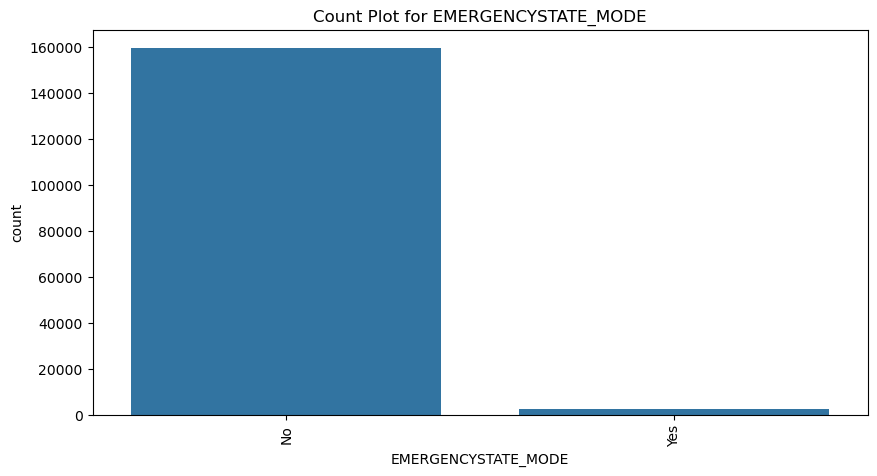

In [49]:
for column in categorical_column:
  plt.figure(figsize=(10, 5))
  sns.countplot(x=column, data=application_train)
  plt.title(f"Count Plot for {column}")
  plt.xticks(rotation=90)
  plt.show()

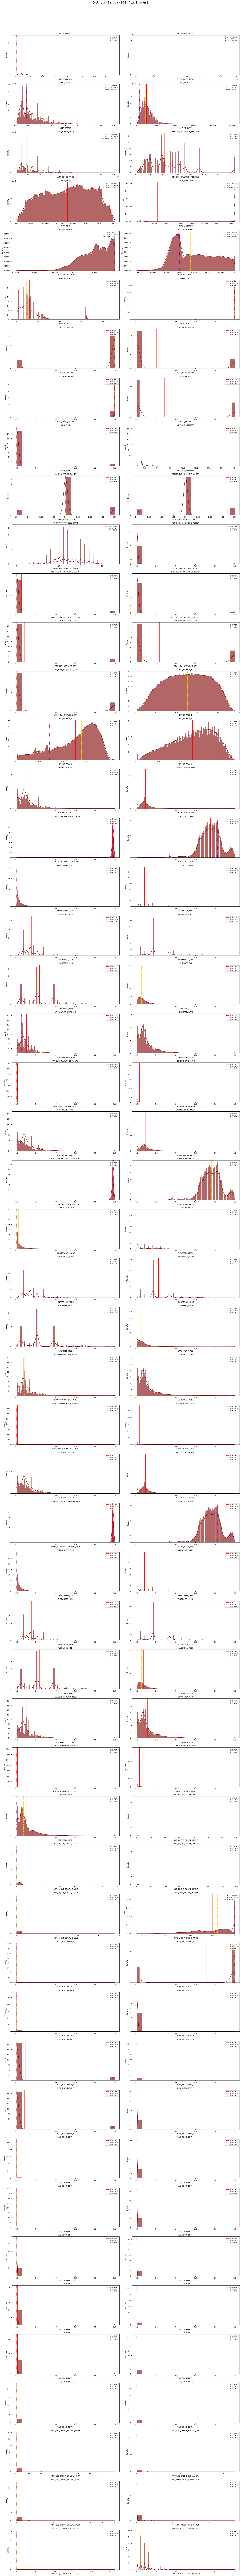

In [51]:
import math

numeric_cols = application_train.select_dtypes(include=np.number).columns.tolist()
if 'TARGET' in numeric_cols:
    numeric_cols.remove('TARGET')

n_features = len(numeric_cols)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
fig.suptitle(f'Distribusi Semua ({n_features}) Fitur Numerik', fontsize=18, y=1.02)
axes = axes.flatten()

for i, column in enumerate(numeric_cols):
    data_series = application_train[column].dropna()

    if data_series.empty:
        axes[i].set_title(f'{column} (Kosong)', fontsize=10)
        continue

    sns.histplot(
        data_series,
        ax=axes[i],
        kde=True,
        stat="density",
        color='maroon',
        alpha=0.6,
        linewidth=0
    )

    mean_val = data_series.mean()
    median_val = data_series.median()
    mode_val = data_series.mode().iloc[0] if not data_series.empty else np.nan

    axes[i].axvline(mean_val, color='red', linestyle='solid', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='gold', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')
    if not np.isnan(mode_val):
        axes[i].axvline(mode_val, color='purple', linestyle='dotted', linewidth=2, label=f'Mode: {mode_val:.2f}')

    axes[i].set_title(f'{column}', fontsize=10)
    axes[i].legend(loc='upper right', fontsize=8)


plt.tight_layout(rect=[0, 0, 1, 1.01])
plt.show()

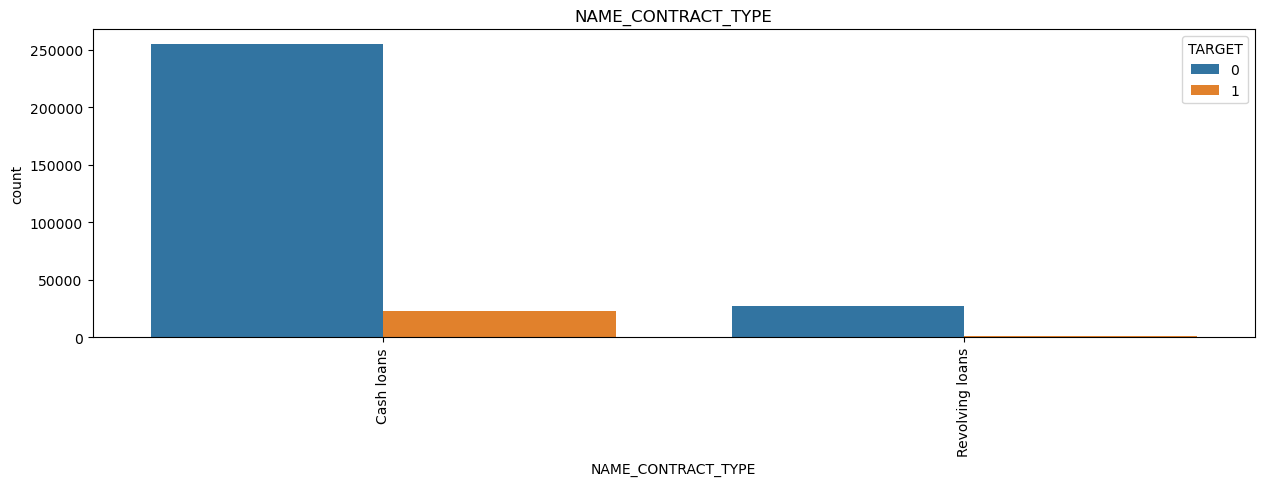

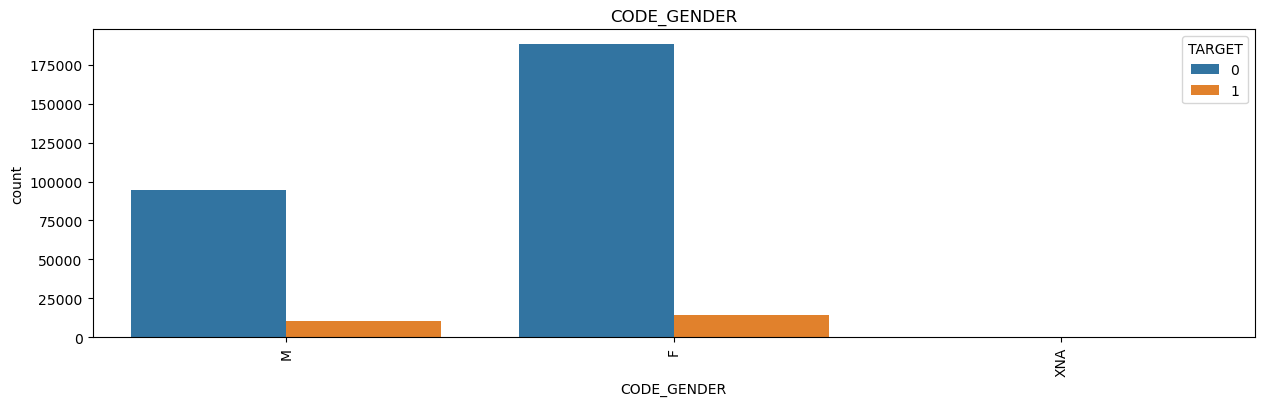

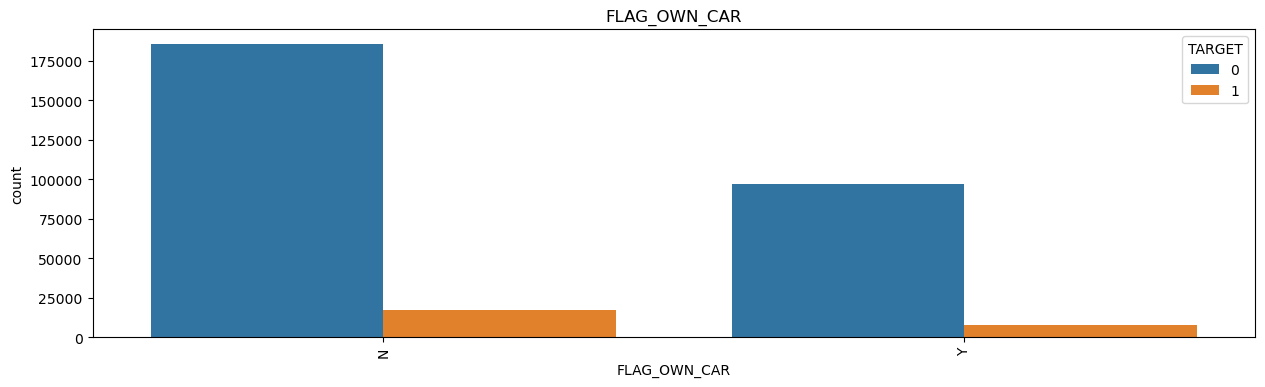

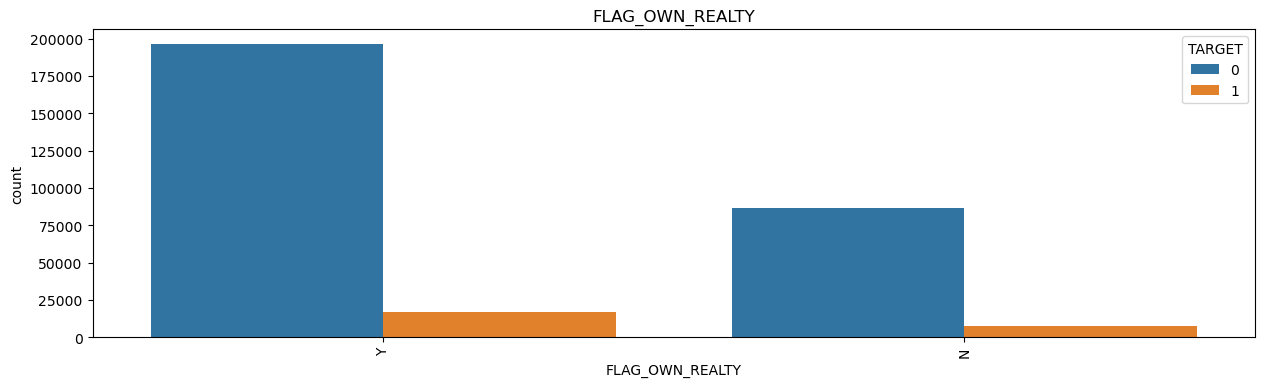

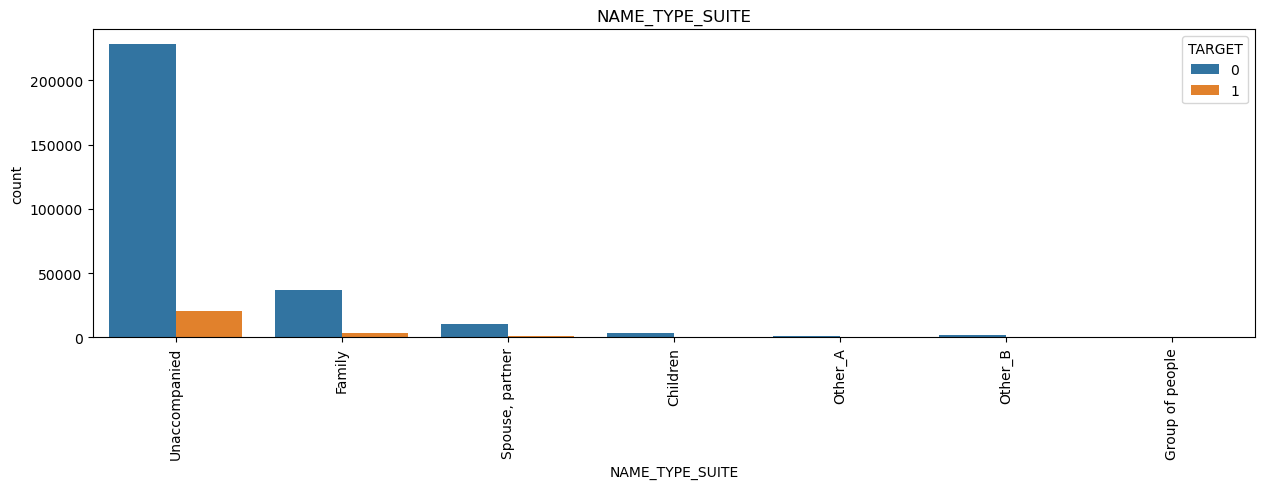

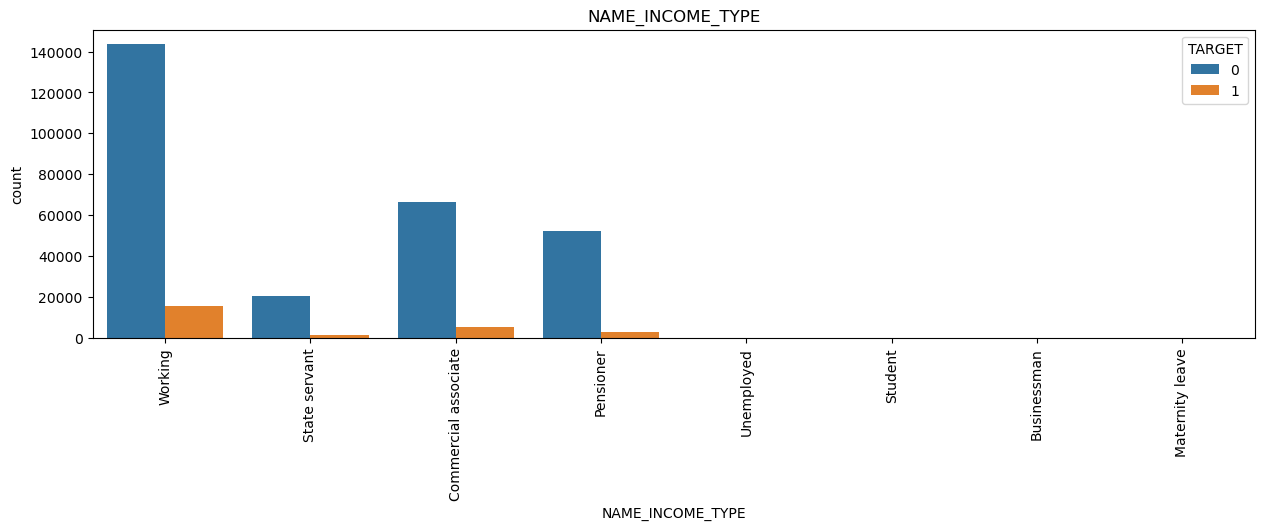

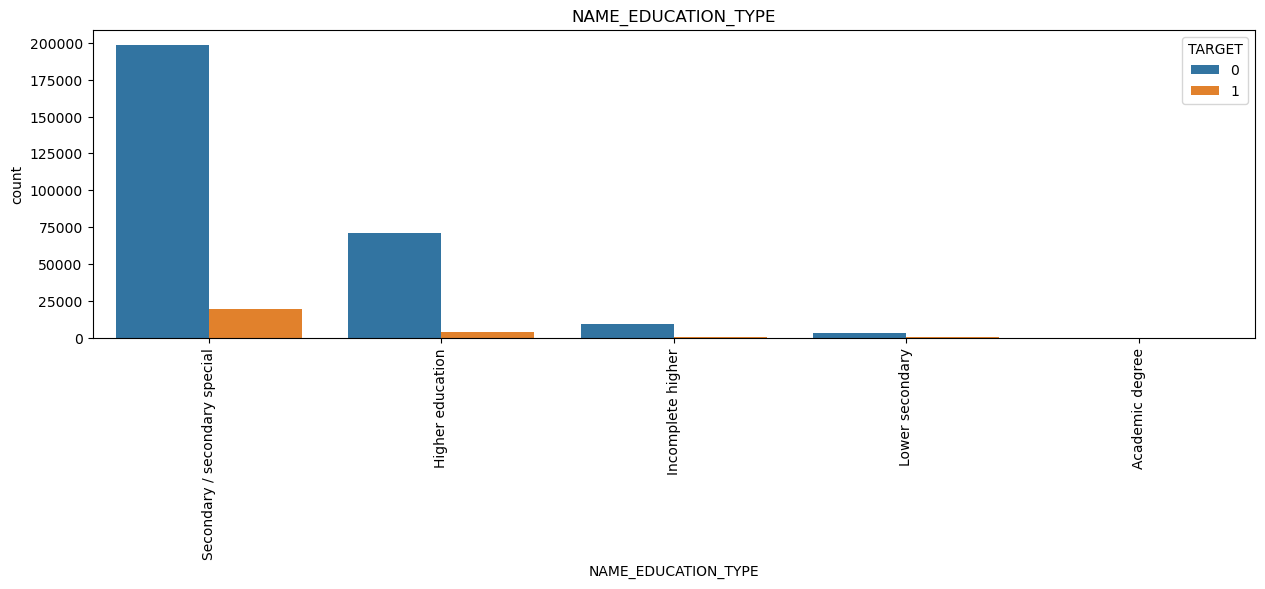

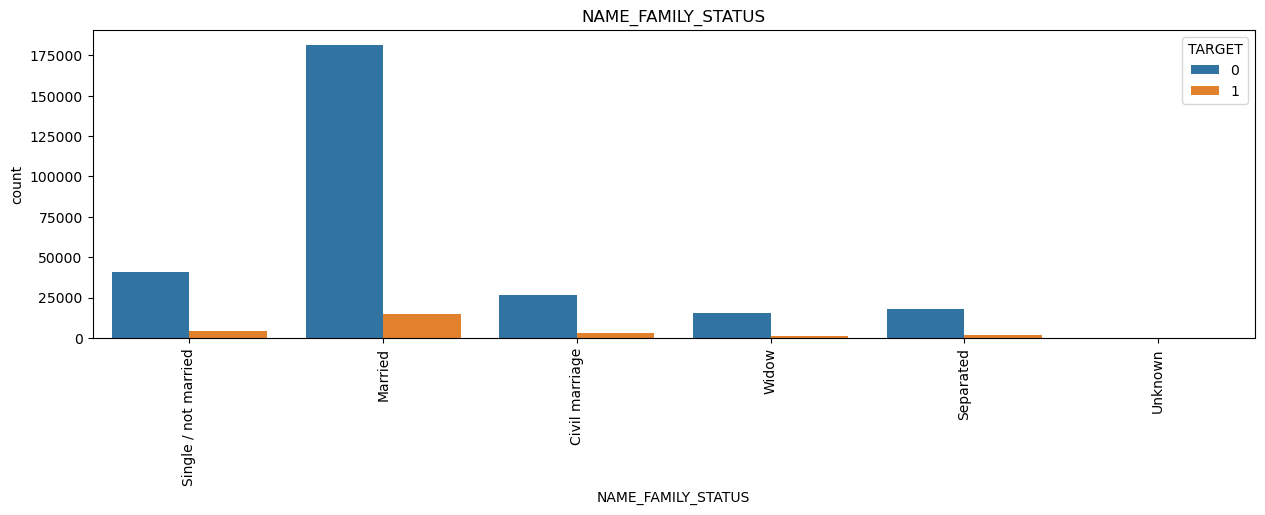

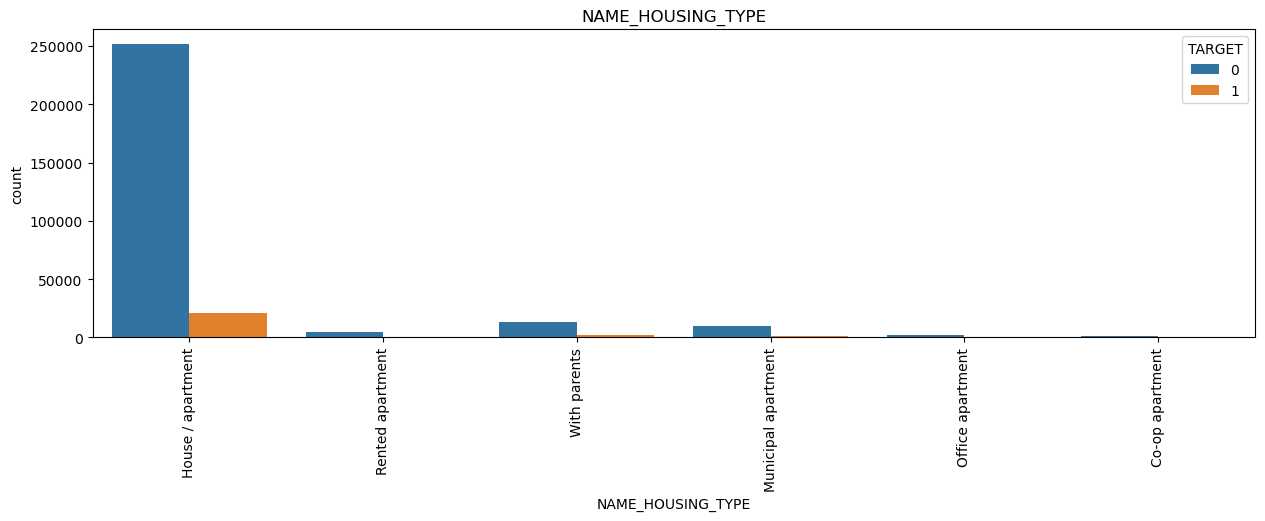

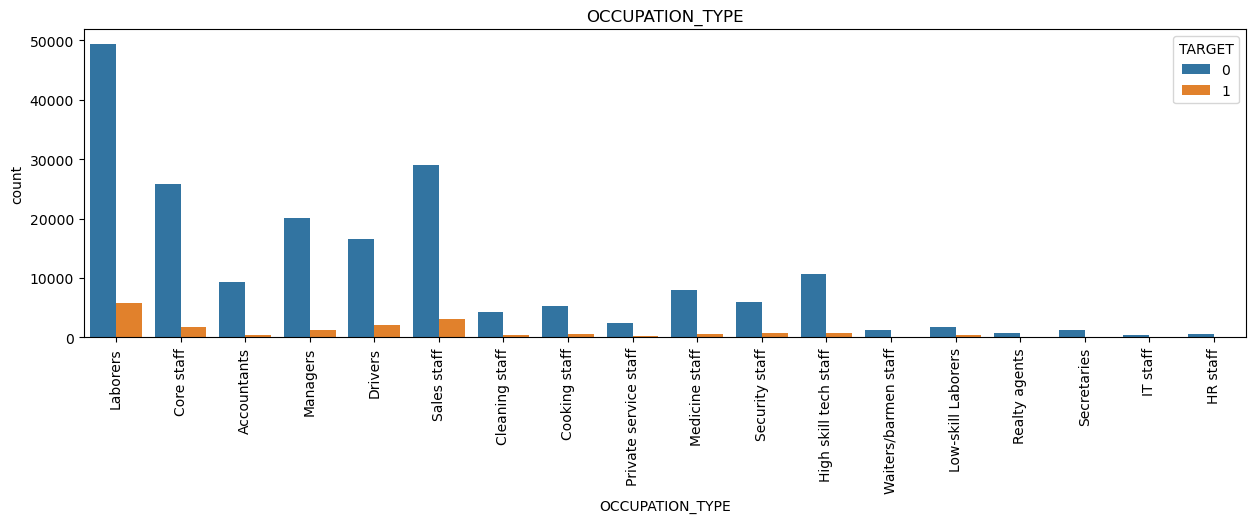

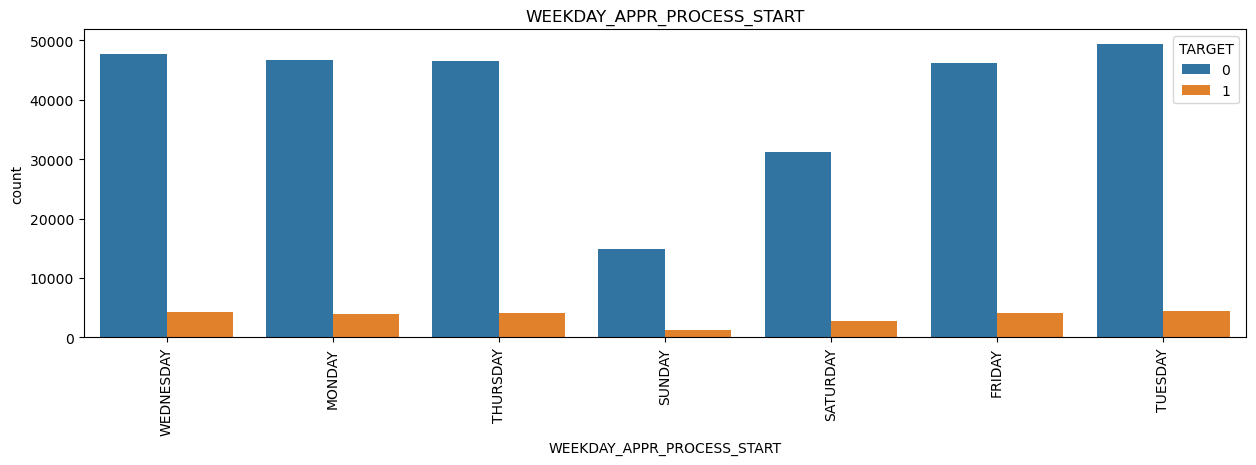

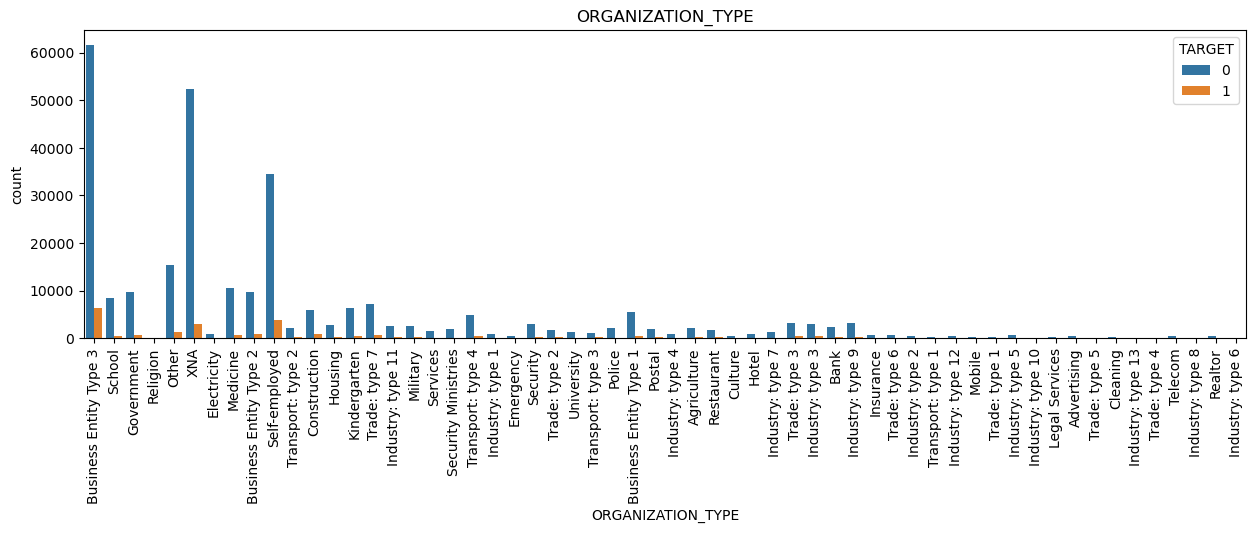

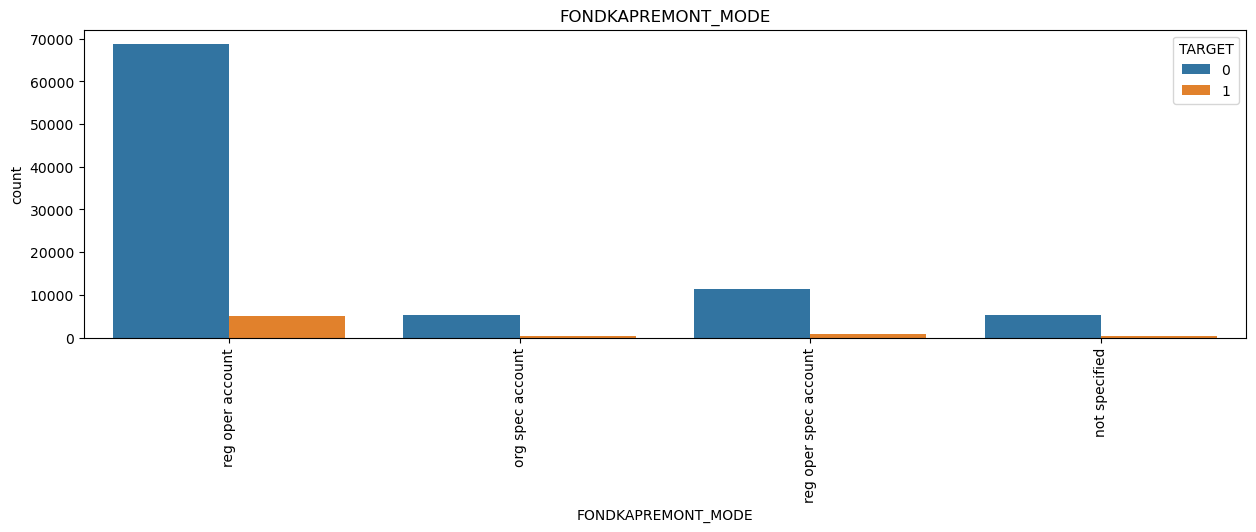

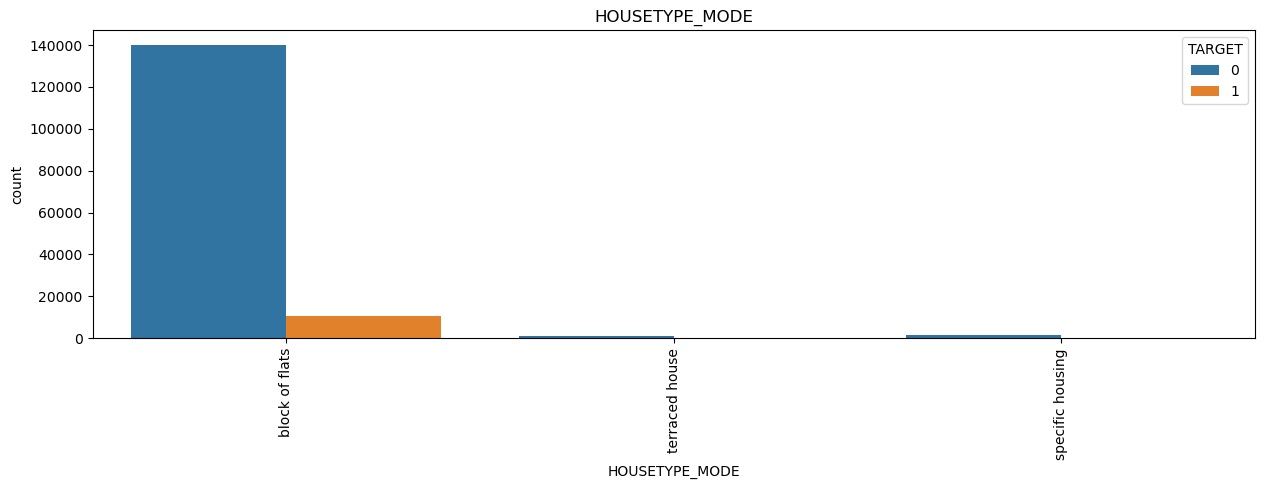

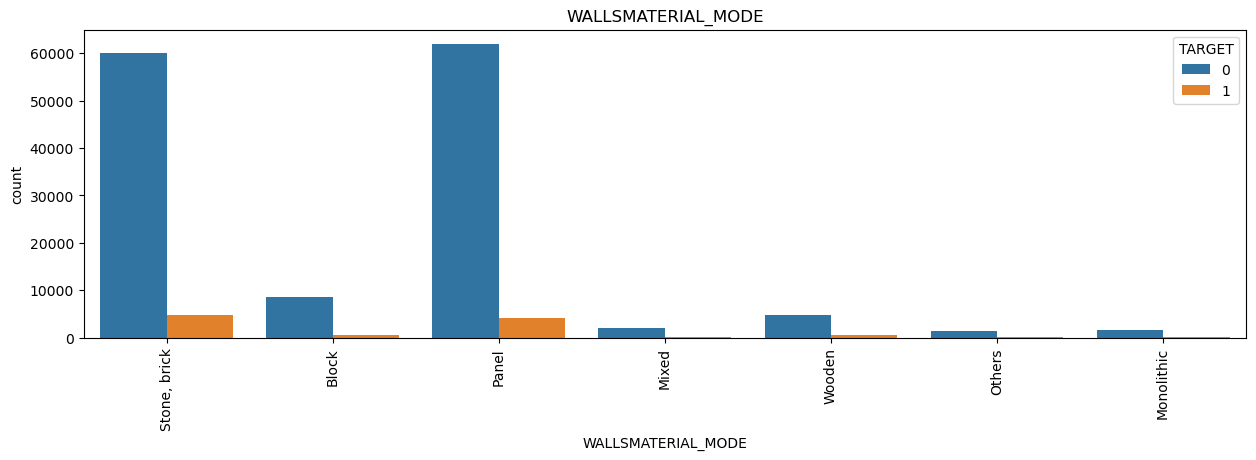

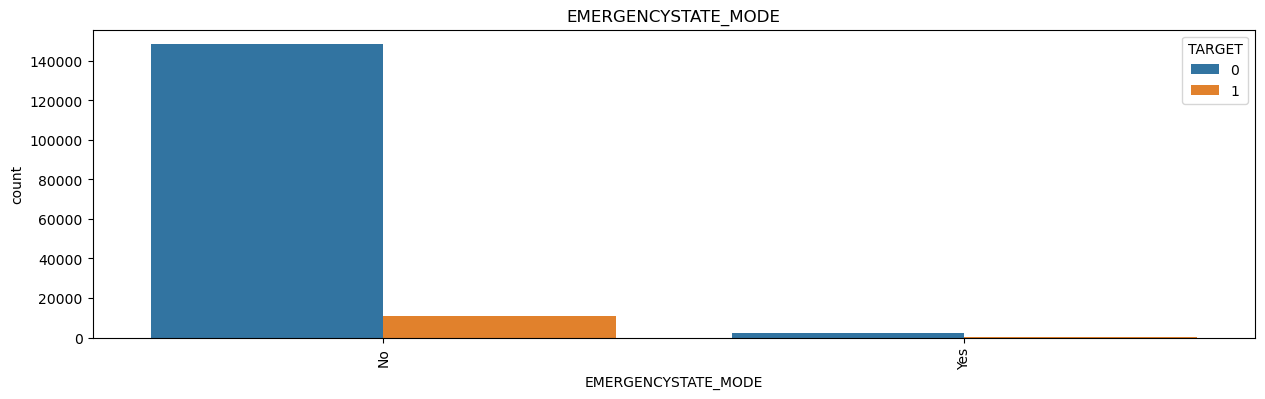

In [52]:
for column in categorical_column:
  plt.figure(figsize=(15, 4))
  sns.countplot(x= application_train[column], hue=application_train['TARGET'])
  plt.title(column)
  plt.xticks(rotation=90)

In [ ]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']

application_train['AGE_GROUP'] = pd.cut(
    application_train['AGE_YEARS'],
    bins=bins,
    labels=labels,
    right=False # Interval [a, b)
)

ax = sns.countplot(
    x='AGE_GROUP',
    hue='TARGET',
    data=application_train,
    palette={0: 'blue', 1: 'red'},
    order=labels
)

plt.title('Risiko Gagal Bayar Berdasarkan Kelompok Usia', fontsize=16)
plt.xlabel('Kelompok Usia', fontsize=12)
plt.ylabel('Jumlah Pemohon', fontsize=12)
plt.legend(title='TARGET', labels=['Tepat Waktu', 'Gagal Bayar'])

# Memutar label X jika diperlukan (meskipun dalam kasus ini tidak terlalu panjang)
plt.xticks(rotation=0)
plt.show()
     

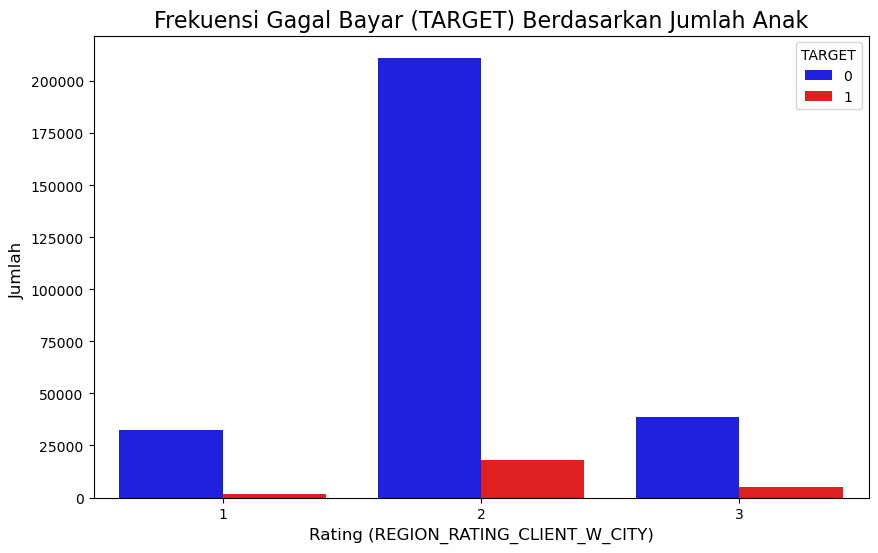

In [53]:
plt.figure(figsize=(10, 6))

# Plot Countplot: REGION_RATING_CLIENT_W_CITY vs. TARGET
ax = sns.countplot(
    x='REGION_RATING_CLIENT_W_CITY',
    hue='TARGET',
    data=application_train,
    palette={0: 'blue', 1: 'red'}
)

plt.title('Frekuensi Gagal Bayar (TARGET) Berdasarkan Jumlah Anak', fontsize=16)
plt.xlabel('Rating (REGION_RATING_CLIENT_W_CITY)', fontsize=12)
plt.ylabel('Jumlah ', fontsize=12)
plt.legend(title='TARGET', labels=['0', '1'])

plt.show()

In [62]:
application_train.dropna(inplace=True)

## Data Pre-Processing

In [59]:
ordinal_cols = application_train.select_dtypes(include=['object']).columns.tolist()
or_encoder = OrdinalEncoder()


application_train[ordinal_cols] = or_encoder.fit_transform(application_train[ordinal_cols])
application_test[ordinal_cols] = or_encoder.fit_transform(application_test[ordinal_cols])

In [60]:
# ASUMSI: df_train adalah DataFrame Anda
X = application_train.drop('TARGET', axis=1)
y = application_train['TARGET']

smote = SMOTE(random_state=9, sampling_strategy=1)
X, y = smote.fit_resample(X, y)

print(pd.Series(y).value_counts())

TARGET
0    8076
1    8076
Name: count, dtype: int64


In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

In [64]:
df_corr = pd.concat([X_train.copy(), y_train.rename('TARGET')], axis=1)

corr_matrix = df_corr.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
cols_to_drop = set()

for column in upper.columns:
    highly_correlated_features = upper.index[upper[column] > 0.90].tolist()

    for feature in highly_correlated_features:
        if feature not in cols_to_drop and column not in cols_to_drop:
            corr_feature_target = corr_matrix.loc[feature, 'TARGET']
            corr_column_target = corr_matrix.loc[column, 'TARGET']

            # Pertahankan yang memiliki korelasi lebih besar ke TARGET
            if corr_feature_target < corr_column_target:
                cols_to_drop.add(feature)
            else:
                cols_to_drop.add(column)

if 'TARGET' in cols_to_drop:
    cols_to_drop.remove('TARGET')

In [66]:
X_train_clean = X_train.drop(columns=cols_to_drop, errors='ignore')
X_test_clean = X_test.drop(columns=cols_to_drop, errors='ignore')
df_test_clean = application_test.drop(columns=cols_to_drop, errors='ignore')

In [67]:
X_train_clean.shape

(12921, 86)

In [68]:
y_train.shape

(12921,)

In [70]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_clean), columns=X_train_clean.columns, index=X_train_clean.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_clean), columns=X_test_clean.columns, index=X_test_clean.index)

## Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [75]:
y_pred_proba = lr.predict_proba(X_test_scaled)[:, 1]
y_pred = lr.predict(X_test_scaled)

## Evaluasi Model

In [80]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

auc_score = roc_auc_score(y_test, y_pred_proba)
cm = confusion_matrix(y_test, y_pred)

print("Hasil Evaluasi Model Regresi Logistik")
print(f"Area Under the Curve (AUC): {auc_score:.4f}")

print("Classification Report")
print(classification_report(y_test, y_pred))

Hasil Evaluasi Model Regresi Logistik
Area Under the Curve (AUC): 0.9213
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1607
           1       0.84      0.86      0.85      1624

    accuracy                           0.85      3231
   macro avg       0.85      0.85      0.85      3231
weighted avg       0.85      0.85      0.85      3231



[[1351  256]
 [ 235 1389]]


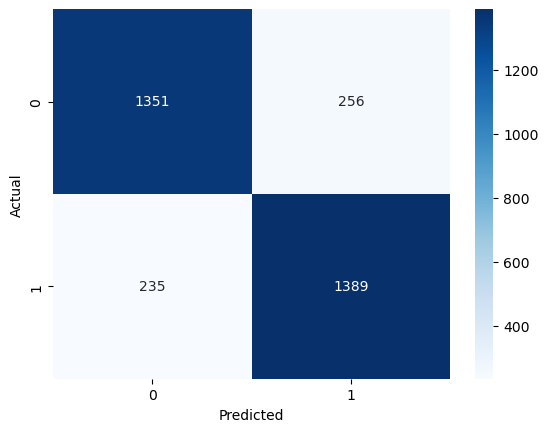

In [81]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=[0,1], yticklabels=[0,1], fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## XGBoost

In [86]:
import xgboost as xgb

xgb = xgb.XGBClassifier(random_state=42)
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [87]:
y_pred_proba = xgb.predict_proba(X_test_scaled)[:, 1]
y_pred = xgb.predict(X_test_scaled)

## Evaluasi Model

In [88]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

auc_score = roc_auc_score(y_test, y_pred_proba)
cm = confusion_matrix(y_test, y_pred)

print("Hasil Evaluasi Model Regresi Logistik")
print(f"Area Under the Curve (AUC): {auc_score:.4f}")

print("Classification Report")
print(classification_report(y_test, y_pred))

Hasil Evaluasi Model Regresi Logistik
Area Under the Curve (AUC): 0.9859
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1607
           1       1.00      0.94      0.96      1624

    accuracy                           0.97      3231
   macro avg       0.97      0.97      0.97      3231
weighted avg       0.97      0.97      0.97      3231



[[1601    6]
 [ 105 1519]]


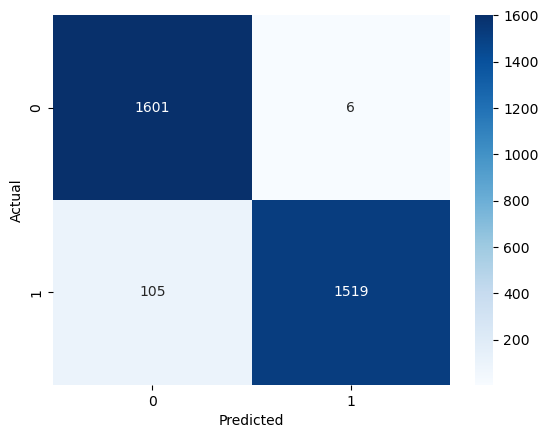

In [89]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=[0,1], yticklabels=[0,1], fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## LightGBM

In [90]:
import lightgbm as lgb

lgbc = lgb.XGBClassifier(random_state=42)
lgbc.fit(X_train_scaled, y_train)

AttributeError: module 'lightgbm' has no attribute 'XGBClassifier'